### Task-01

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as sts
import math
from scipy.stats import norm

### 1- Randomly selected bill amount between USD55 and USD 80

In [135]:
mean=70
std=11.351
lower_p = 55
upper_p = 80
norm_p=np.arange(lower_p, upper_p)
prob_bill=norm.pdf(norm_p,mean, std)
print(sum(prob_bill))

0.7127846264338699


### 2- Randomly selected bill amount no more than USD40

In [136]:
mean=70
std=11.351
lower_p = 1
upper_p = 40
norm_p1=np.arange(lower_p, upper_p)
prob_bill1=norm.pdf(norm_p1,mean, std)
print(sum(prob_bill1))

0.003595608320766236


### Task-2

#### A-Extract data from the car riding data

In [137]:
df=pd.read_csv("DS1_C5_S5_SmartCarRiding_Data_Practice.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [138]:
pop_median=df["fare_amount"].median()
print(f"Population of median {pop_median}")

Population of median 8.5


#### B-Outlier Treatment

In [139]:
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
iqr = q3-q1

lf = q1-1.5*iqr
uf = q3+1.5*iqr

outliers = []

for i in df['fare_amount']:
    if i<lf:
        outliers.append(i)
    elif i>uf:
        outliers.append(i)
outliers

[24.5,
 25.7,
 39.5,
 29.0,
 56.8,
 26.1,
 49.57,
 30.9,
 26.9,
 43.0,
 35.3,
 38.54,
 29.0,
 24.0,
 23.0,
 45.0,
 29.5,
 23.7,
 24.0,
 49.8,
 24.0,
 23.0,
 34.25,
 39.33,
 45.0,
 35.7,
 29.3,
 49.8,
 43.0,
 57.33,
 37.5,
 37.47,
 49.57,
 29.7,
 33.7,
 23.7,
 25.7,
 36.0,
 25.7,
 57.33,
 49.8,
 22.5,
 38.83,
 57.33,
 45.0,
 22.5,
 26.33,
 39.5,
 26.1,
 25.3,
 49.8,
 31.8,
 26.1,
 49.57,
 33.3,
 49.8,
 25.07,
 40.5,
 43.0,
 52.0,
 27.0,
 52.0,
 30.83,
 35.33,
 93.16,
 27.0,
 40.33,
 24.5,
 32.9,
 34.0,
 26.0,
 23.0,
 23.0,
 31.83,
 22.5,
 29.8,
 69.25,
 26.1,
 57.33,
 25.0,
 51.5,
 35.3,
 39.33,
 23.0,
 57.33,
 41.5,
 52.0,
 45.0,
 42.8,
 40.3,
 23.5,
 23.0,
 28.5,
 25.7,
 25.3,
 36.8,
 36.8,
 33.5,
 41.83,
 43.7,
 22.5,
 27.6,
 29.7,
 46.1,
 23.5,
 33.33,
 31.07,
 28.9,
 45.33,
 24.5,
 37.5,
 33.3,
 49.83,
 29.47,
 52.0,
 22.5,
 40.54,
 52.0,
 45.33,
 25.0,
 32.83,
 45.0,
 57.33,
 50.0,
 29.0,
 26.1,
 45.0,
 57.54,
 24.0,
 41.33,
 22.5,
 27.5,
 31.33,
 25.3,
 23.5,
 45.0,
 27.5,
 56.0,

In [140]:
df['fare_amount'].replace(outliers,8.5 , inplace=True)

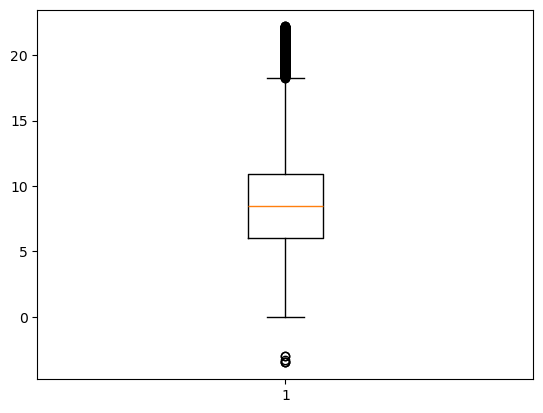

In [141]:
plt.boxplot(df["fare_amount"]);

### Population Distribution 

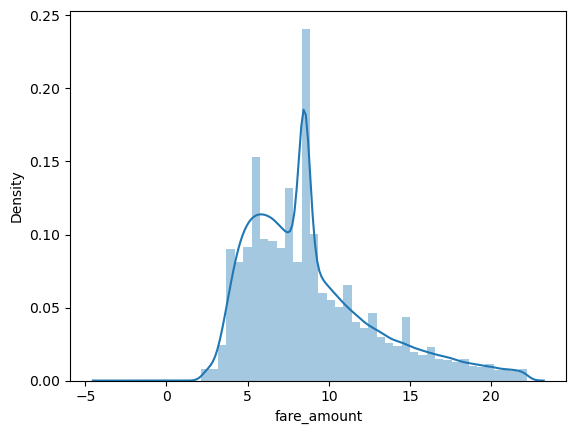

In [142]:
sb.distplot(df["fare_amount"]);

#### C-Draw Samples Plots

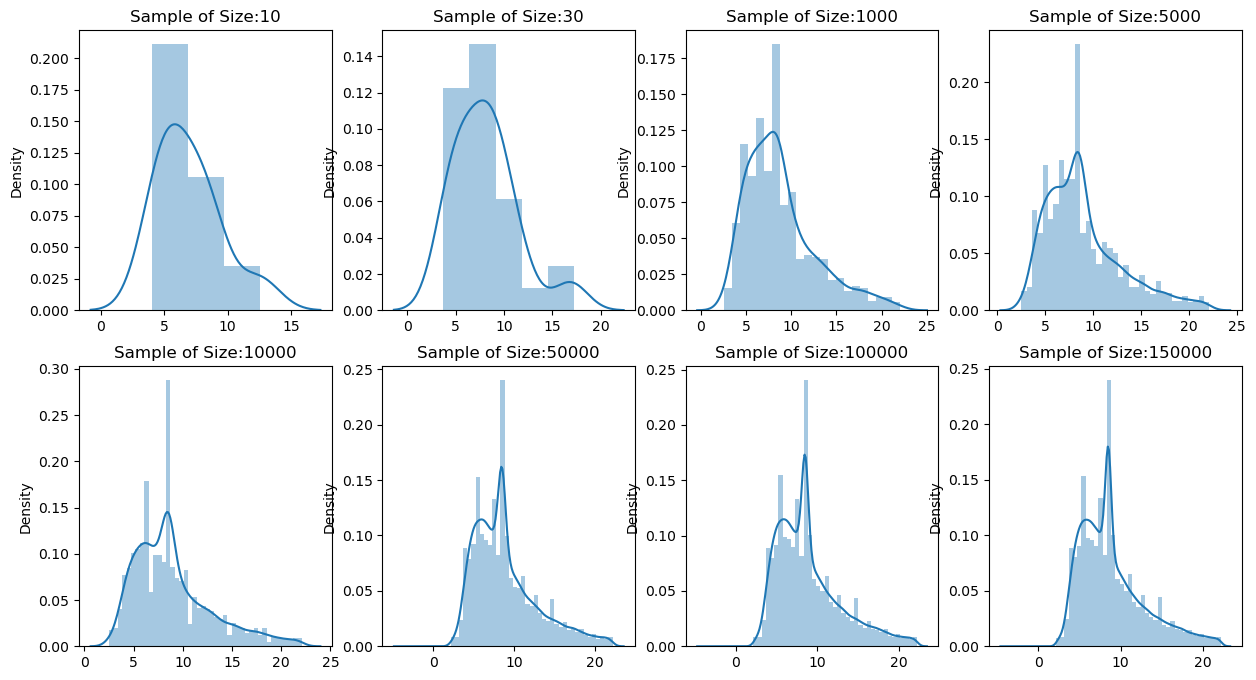

In [143]:
fig, ax = plt.subplots(2,4, figsize=(15,8))
num = [10,30,1000,5000,10000,50000,100000,150000]
sample_df = pd.DataFrame()
data_s = []

for i in num:
  sample_df = df.sample(n=i, random_state=1)
  data_s.append(sample_df['fare_amount'].tolist())

data_s
k = 0
for i in range(0,2):
  for j in range(0,4):
    # ax[i,j].hist(data_s[k], bins=5)
    sb.distplot(data_s[k], ax=ax[i,j])
    ax[i,j].set_title("Sample of Size:"+str(len(data_s[k])))
    k = k+1

plt.show()

#### D-Random Sampling for 200

In [144]:
random_sample=df.sample(n=200,replace=True,random_state=1)
random_sample

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
128037,34880869,2010-12-26 14:32:56.0000001,8.5,2010-12-26 14:32:56 UTC,-73.965069,40.791239,-73.782221,40.648726,1
5192,10514640,2012-11-27 21:28:00.00000038,14.0,2012-11-27 21:28:00 UTC,-73.776675,40.645348,-73.819305,40.670327,2
50057,39371632,2010-08-23 22:09:00.000000158,12.9,2010-08-23 22:09:00 UTC,-73.994013,40.724697,-73.994923,40.762680,1
109259,37753824,2013-10-09 08:22:30.0000003,6.0,2013-10-09 08:22:30 UTC,-73.981399,40.741402,-73.991322,40.739277,1
73349,48099710,2012-01-17 20:23:07.0000001,6.1,2012-01-17 20:23:07 UTC,-73.988700,40.748039,-74.003445,40.738223,2
...,...,...,...,...,...,...,...,...,...
119440,38653342,2011-01-15 13:29:00.000000149,7.7,2011-01-15 13:29:00 UTC,-73.966792,40.788865,-73.981745,40.766047,1
176028,16314367,2009-04-23 13:26:00.00000062,4.5,2009-04-23 13:26:00 UTC,-73.993047,40.743015,-73.982815,40.738575,5
38122,37151879,2013-12-19 20:57:00.000000160,13.0,2013-12-19 20:57:00 UTC,-73.978997,40.762238,-73.987182,40.751058,1
15917,4467260,2012-08-14 02:52:26.0000001,4.5,2012-08-14 02:52:26 UTC,-73.965087,40.714338,-73.957762,40.717726,1


#### E-Calculate the Central Tendency

#####  Calculation of Population Parameter (Mean, Median, Standard Deviation)

In [145]:
p_mean = df['fare_amount'].mean()
p_median = df['fare_amount'].median()
p_std = df['fare_amount'].std()
p_skew = sts.skew(df['fare_amount'], bias = False)
p_kurt = sts.kurtosis(df['fare_amount'], bias = False)

print("Population mean is", p_mean)
print("Population median is", p_median)
print("Population standard deviation is", p_std)
print("Population skew is", p_skew)
print("Population kurtosis is", p_kurt)

Population mean is 8.902319600000002
Population median is 8.5
Population standard deviation is 3.9633736896889458
Population skew is 1.069346160582149
Population kurtosis is 0.8285942645415538


#####  Calculation of Sample Statistics (Mean, Median, Standard Deviation) 

In [146]:
s_mean = random_sample['fare_amount'].mean()
s_median = random_sample['fare_amount'].median()
s_std = random_sample['fare_amount'].std()
s_skew = sts.skew(random_sample['fare_amount'], bias = False)
s_kurt = sts.kurtosis(random_sample['fare_amount'], bias = False)

print("Sample mean is", s_mean)
print("Sample median is", s_median)
print("Sample standard deviation is", s_std)
print("Sample skew is", s_skew)
print("Sample kurtosis is", s_kurt)

Sample mean is 8.934149999999999
Sample median is 8.5
Sample standard deviation is 3.971918802337458
Sample skew is 1.178544184102183
Sample kurtosis is 1.2198341750953192


#### Probability & Sample  Distribution curve of population and sample

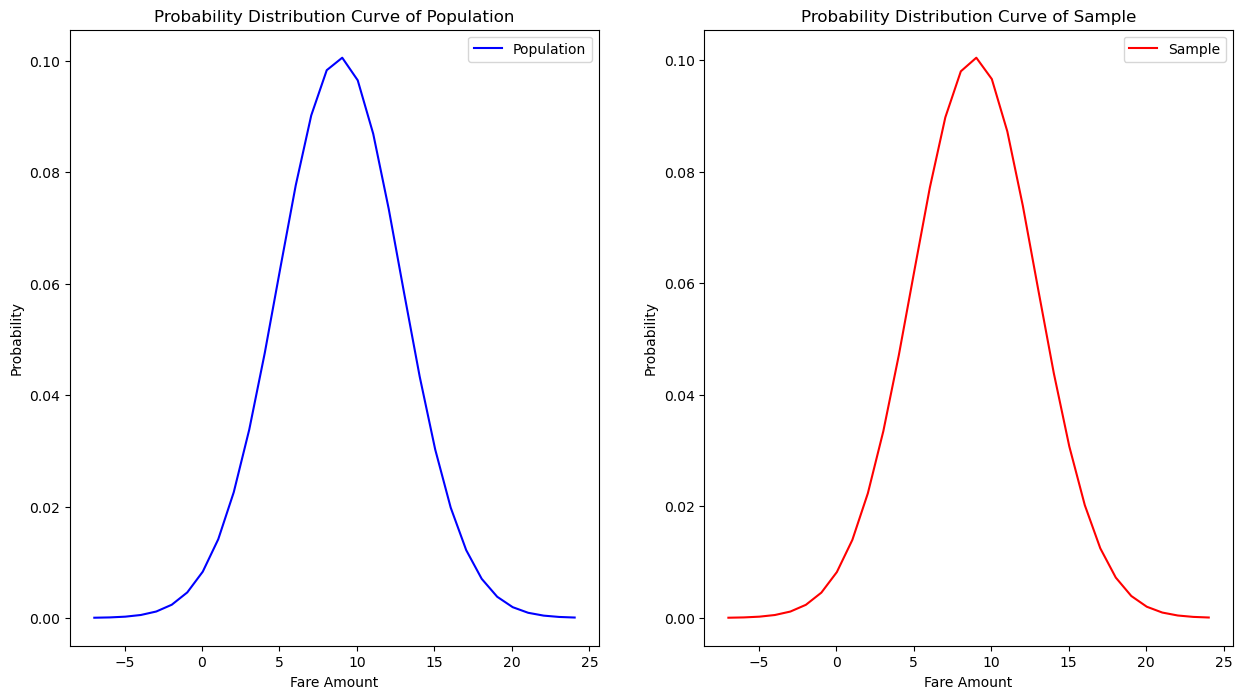

In [147]:
plt.figure(figsize=(15,8))

lower_p = p_mean - 4*p_std
upper_p = p_mean + 4*p_std

lower_s = s_mean - 4*s_std
upper_s = s_mean + 4*s_std

norm_p = np.arange(lower_p, upper_p)
norm_s = np.arange(lower_s, upper_s)

plt.subplot(1,2,1)
plt.plot(norm_p, norm.pdf(norm_p, p_mean, p_std), label = "Population", color = "blue")
plt.legend()
plt.xlabel("Fare Amount")
plt.ylabel("Probability")
plt.title("Probability Distribution Curve of Population")

plt.subplot(1,2,2)
plt.plot(norm_s, norm.pdf(norm_s, s_mean, s_std), label = "Sample", color = "red")
plt.legend()
plt.xlabel("Fare Amount")
plt.ylabel("Probability")
plt.title("Probability Distribution Curve of Sample")
plt.show()

### Interpretation

In [148]:
#  As per my report comparing the Population and Sample are approximately equal 
#  200 sample are perfect for Standard Normal Distribution
#  sampling distribution will tend to normal distribution
#  Sample mean ~ Population mean
#  As size of sample is increasing sample standard deviation will decrease

# Challenge

## Income Tax return for Taxpayers

#### Task-1

In [149]:
mean=1332
sd=725
x = 2000
z_score = (x-mean)/sd
prob = 1 - sts.norm.cdf(z_score)
print("Probability of 2000 is", prob)

Probability of 2000 is 0.1784262133979203


#### Task-2

In [150]:
x = 0
z_score = (x-mean)/sd
prob = 1 - sts.norm.cdf(z_score)
print("Probability of 2000 is", prob)

Probability of 2000 is 0.9669128652410731


# High-End Video Games

In [151]:
Games_df=pd.read_csv("DS1_C5_S5_Computers_Data_Challenge.csv")
Games_df

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


### Task-1

In [152]:
Games_sample=Games_df[Games_df["price"]<=4000].sample(n=50,replace=True,random_state=1)
Games_sample

,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
5187,5188,1429,33,424,4,15,no,no,yes,182,24
239,240,3795,66,500,8,14,no,no,yes,100,3
4006,4007,1890,33,340,4,17,no,no,yes,273,18
5222,5223,1728,66,428,4,17,no,no,yes,182,24
913,914,2299,66,245,8,14,no,no,yes,249,7
2789,2790,2620,66,528,8,14,yes,no,yes,292,14
2921,2922,1344,25,107,2,14,no,no,yes,267,15
5086,5087,2339,66,540,8,17,no,no,yes,182,24
148,149,1975,33,250,8,14,no,no,yes,95,2
4252,4253,1649,66,212,4,15,no,no,yes,248,20


### Task-2

#### Calculate the Central Tendency

#####  Calculation of Population Parameter (Mean, Median, Standard Deviation)

In [153]:
p_mean = Games_df['price'].mean()
p_median = Games_df['price'].median()
p_std = Games_df['price'].std()
p_skew = sts.skew(Games_df['price'], bias = False)
p_kurt = sts.kurtosis(Games_df['price'], bias = False)

print("Population mean is", p_mean)
print("Population median is", p_median)
print("Population standard deviation is", p_std)
print("Population skew is", p_skew)
print("Population kurtosis is", p_kurt)

Population mean is 2219.576609682058
Population median is 2144.0
Population standard deviation is 580.8039556527048
Population skew is 0.7117247480608602
Population kurtosis is 0.7304170367653207


#####  Calculation of Sample Statistics (Mean, Median, Standard Deviation)

In [154]:
samples = [50, 100, 200, 500, 1000, 2000, 3000, 5000]
statistics = {'Sample_Size': [],'Mean': [],'Median': [],'Std_Dev': [],'Skew': [],'Kurtosis': []}

for i in samples:
    sample_df = Games_df.sample(n=i, random_state=1)
    s_mean = sample_df['price'].mean()
    s_median = sample_df['price'].median()
    s_std = sample_df['price'].std()
    s_skew = sts.skew(sample_df['price'], bias=False)
    s_kurt = sts.kurtosis(sample_df['price'], bias=False)

    statistics['Sample_Size'].append(i)
    statistics['Mean'].append(s_mean)
    statistics['Median'].append(s_median)
    statistics['Std_Dev'].append(s_std)
    statistics['Skew'].append(s_skew)
    statistics['Kurtosis'].append(s_kurt)

    print(f'Sample Size: {i}')
    print(f'Sample Mean ({i}):', s_mean)
    print(f'Sample Median ({i}):', s_median)
    print(f'Sample Standard Deviation ({i}):', s_std)
    print(f'Sample Skew ({i}):', s_skew)
    print(f'Sample Kurtosis ({i}):', s_kurt)
    print()

statistics_df = pd.DataFrame(statistics)
print(statistics_df)

Sample Size: 50
Sample Mean (50): 2323.36
Sample Median (50): 2290.0
Sample Standard Deviation (50): 691.6985824617483
Sample Skew (50): 1.0291059071125048
Sample Kurtosis (50): 1.922003851579869

Sample Size: 100
Sample Mean (100): 2243.87
Sample Median (100): 2197.0
Sample Standard Deviation (100): 618.1028918792526
Sample Skew (100): 0.9024929323871183
Sample Kurtosis (100): 1.7042397774112992

Sample Size: 200
Sample Mean (200): 2266.72
Sample Median (200): 2198.5
Sample Standard Deviation (200): 633.0320445658627
Sample Skew (200): 0.7450590383338814
Sample Kurtosis (200): 0.7938138887024229

Sample Size: 500
Sample Mean (500): 2254.766
Sample Median (500): 2195.0
Sample Standard Deviation (500): 595.8144753377879
Sample Skew (500): 0.6720590833053841
Sample Kurtosis (500): 0.5939632967859945

Sample Size: 1000
Sample Mean (1000): 2237.822
Sample Median (1000): 2159.5
Sample Standard Deviation (1000): 592.5400340972824
Sample Skew (1000): 0.797104437401323
Sample Kurtosis (1000): 

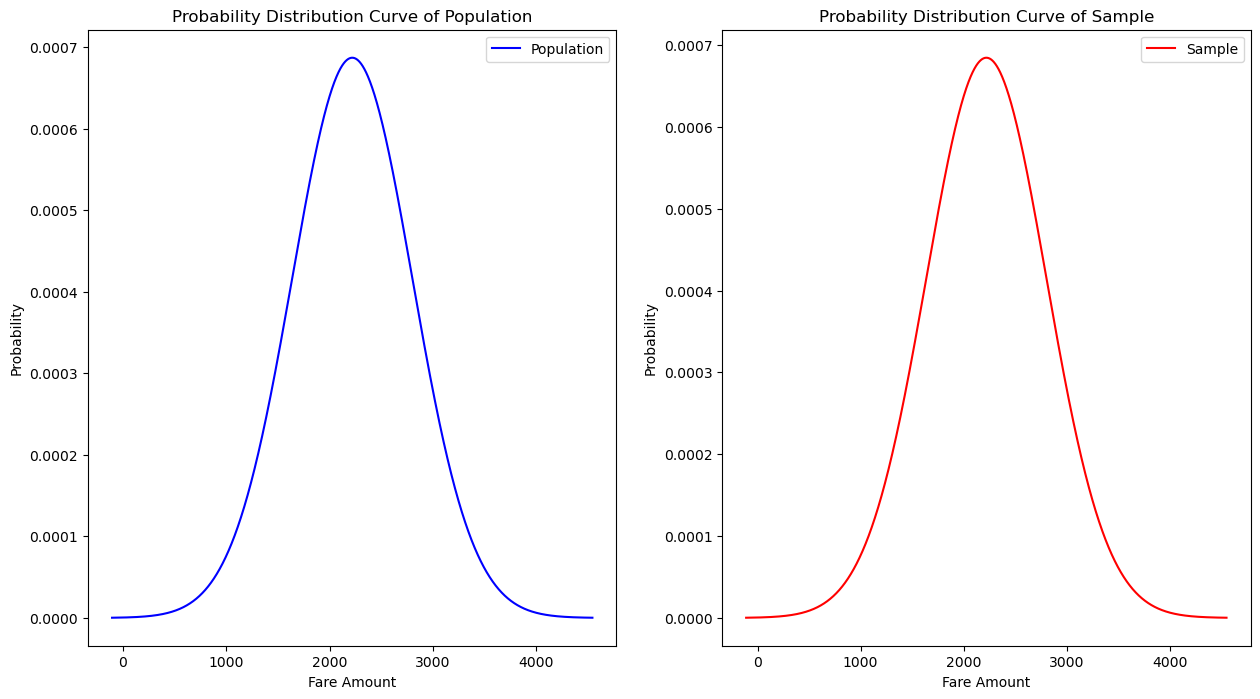

In [155]:
plt.figure(figsize=(15,8))

lower_p1 = p_mean - 4*p_std
upper_p1 = p_mean + 4*p_std

lower_s1 = s_mean - 4*s_std
upper_s1 = s_mean + 4*s_std

norm_p1 = np.arange(lower_p1, upper_p1)
norm_s1 = np.arange(lower_s1, upper_s1)

plt.subplot(1,2,1)
plt.plot(norm_p1, norm.pdf(norm_p1, p_mean, p_std), label = "Population", color = "blue")
plt.legend()
plt.xlabel("Fare Amount")
plt.ylabel("Probability")
plt.title("Probability Distribution Curve of Population")

plt.subplot(1,2,2)
plt.plot(norm_s1, norm.pdf(norm_s1, s_mean, s_std), label = "Sample", color = "red")
plt.legend()
plt.xlabel("Fare Amount")
plt.ylabel("Probability")
plt.title("Probability Distribution Curve of Sample")
plt.show()

In [156]:
#  As per my report comparing the Population and Sample are not equal
#  Sample mean not equal Population mean
#  As size of sample is decrease compare to population standard deviation 

## Task-3

#### Normal Distribution plot of the population

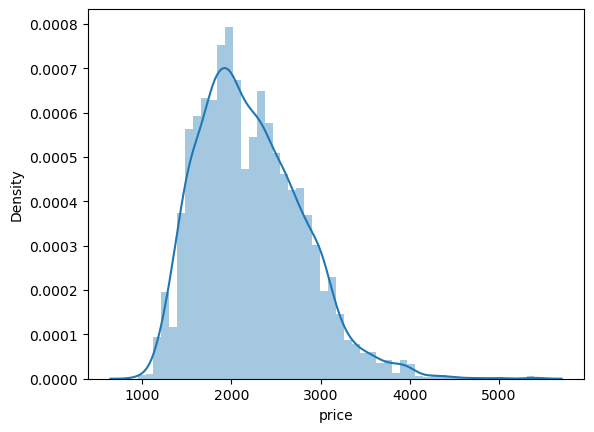

In [157]:
sb.distplot(Games_df["price"]);

#### Normal Distribution plot of the Sample

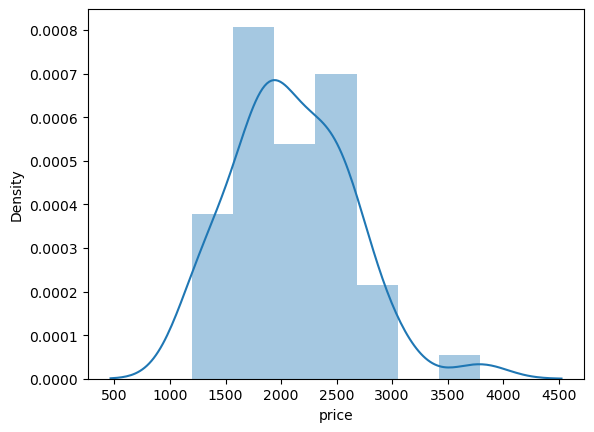

In [158]:
sb.distplot(Games_sample["price"]);

## Task-5

#### Calculate the Z-Score

In [159]:
import statistics as st
standard_data = []
for i in norm_s1:
  zs = (i - s_mean)/s_std
  standard_data.append(zs)

ZScore=sts.norm.pdf(standard_data, st.mean(standard_data), st.stdev(standard_data))
print(sum(ZScore))

534.3158626109989


## Task-6

### Calculate probality values of the z-score

In [160]:
x = 3000
z_score_85000 = (x-p_mean)/p_std
prob = 1 - sts.norm.cdf(z_score_85000)
print("Probability of 4000 is", prob)

Probability of 4000 is 0.08952351209585485


## Task-7

### Standard normal Distribution

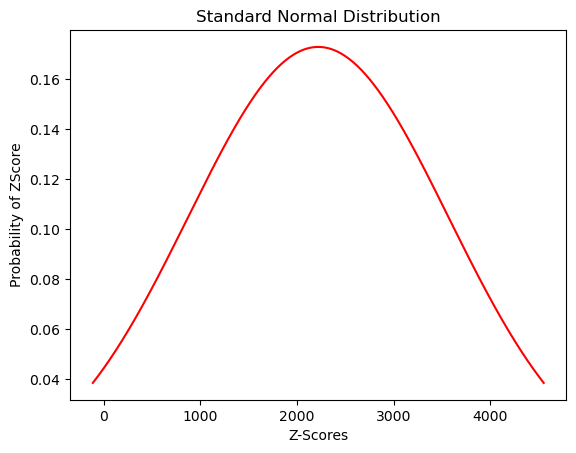

In [161]:
plt.plot(norm_s1,ZScore, color = "red")
plt.xlabel("Z-Scores")
plt.ylabel("Probability of ZScore")
plt.title("Standard Normal Distribution")
plt.show()

### Task--8

#### probability prices Greater than 2700

In [162]:
x = 2700
z_score_85000 = (x-p_mean)/p_std
prob = 1 - sts.norm.cdf(z_score_85000)
print("Probability of 4000 is", prob)

Probability of 4000 is 0.20407046266814133
